<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [1]:
pip install numpy opencv-python scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 9.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [2]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

## Display one raw image directly from your drive

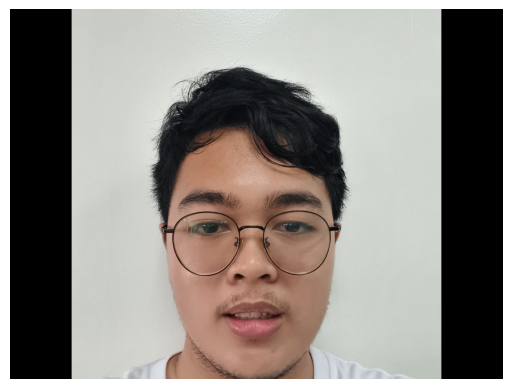

In [ ]:
# put your answer here
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)
  rotated_image = image.rotate(90, expand=True)
  # Display the image using matplotlib
  plt.imshow(rotated_image, cmap='gray', )
  plt.axis('off')  # Hide axes for cleaner display
  plt.show()
  
displayImage('./faces/Train/montaniel/Copy of MontanielTrain1.jpg')

## Load the images from your drive and apply preprocessing to your raw images

In [14]:
# put your answer here
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('./faces/Train/')

images

array([[126, 127, 132, ...,  32,  35,  38],
       [129, 131, 128, ...,  20,  16,  13],
       [131, 131, 130, ...,   9,  10,  12],
       ...,
       [198, 198, 198, ..., 233, 231, 232],
       [203, 200, 203, ..., 232, 221, 214],
       [201, 208, 202, ..., 215, 236, 222]], dtype=uint8)

## Display one pre-processed image from the training set

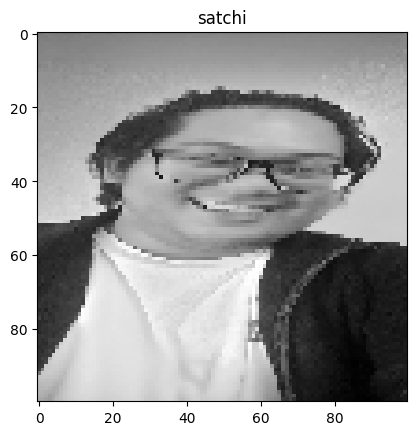

In [21]:
# put your answer here
image = images[0].reshape(100,100)
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

## Display ten pre-processed images from the training set

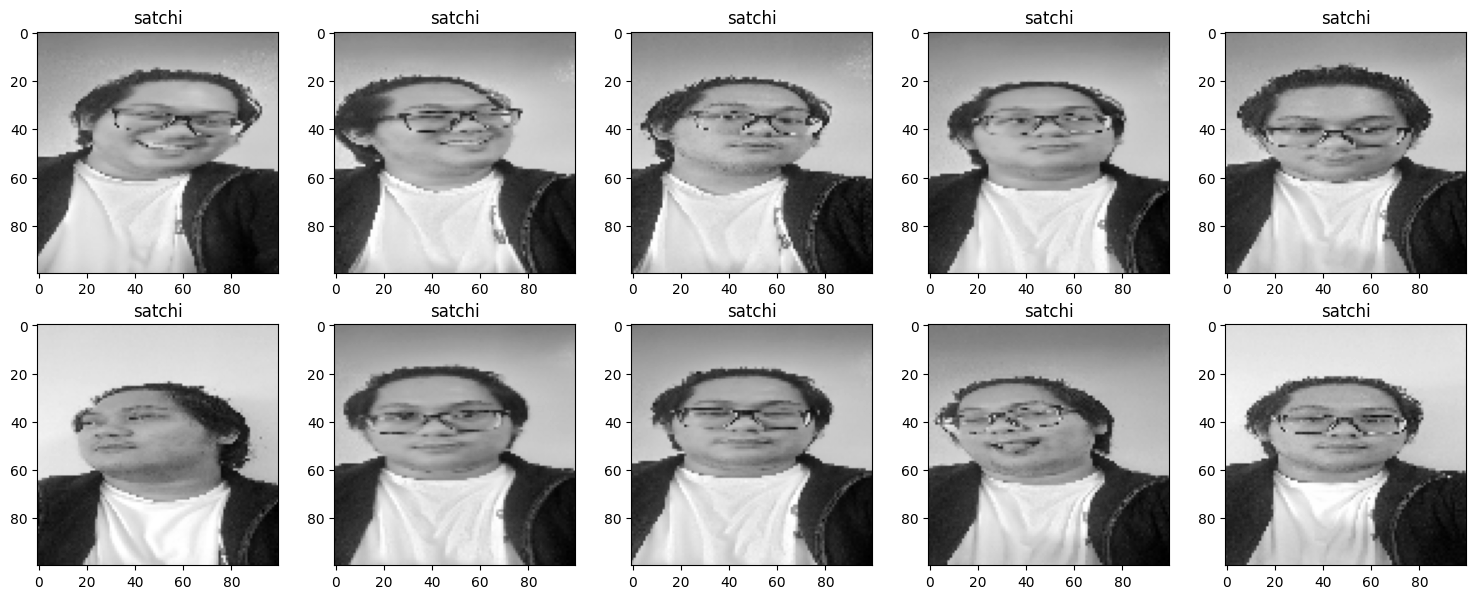

In [22]:
# put your answer here

num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split your data

In [23]:
# put your answer here

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [25]:
# put your answer here

from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [26]:
# put your answer here
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## Test your model using images not in your training set

Test one image of yourself

Predicted label: ['montaniel']


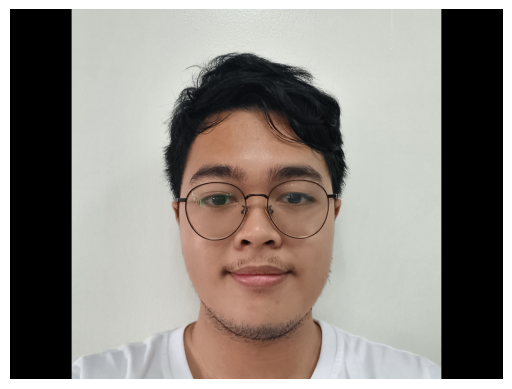

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

img_path = './faces/Test/Copy of MontanielTest4g.jpg.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Test one image of your partner

Predicted label: ['odarve']


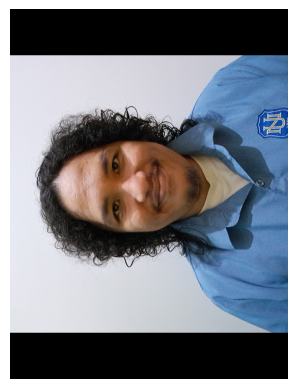

In [43]:

# put your answer here
img_path = './faces/New /Odarve3.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)


img_path = './faces/New /SatchNew4.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)